# Descriptive statistics

- get overall info about participants
- assess normality of response times (RTs)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
import os

alpha = 0.05

d = pd.read_csv(os.path.join("..", "data", "serial-data.csv"), index_col=0)
agg = pd.read_csv(os.path.join("..", "data", "aggregated-data.csv"), index_col=0)

print("Loading:", len(d), "lines", len(d["ParticipantID"].unique()), "participants")

Loading: 23368 lines 254 participants


## Overall info about participants

In [3]:
TPP = 20  # there are 20 trials in practice
TPM = 72  # there are 72 trials in main part
TPL = 20  # there are 20 trials in a lexical test


print("Number of participants:")
display(pd.DataFrame(d["StudyID"].value_counts() / (TPP + TPM)))

print()
print()
print("Different kinds of designers:")

display(pd.DataFrame(d.groupby("StudyID")["Training"].value_counts() / (TPP + TPM)))

Number of participants:


,count
StudyID,
Main,230.0
Pilot,24.0




Different kinds of designers:


count
StudyID Training               
Main    Non-designer      118.0
        Graphic designer   47.0
        Letter designer    37.0
        Other designer     21.0
        Typographer         7.0
Pilot   Non-designer       16.0
        Letter designer     6.0
        Typographer         2.0

# Assess normality of RTs

The distributions of RTs are not normal, but close enough.

Normality test for RT


,W,pval,normal
RT,0.766133,1.238280e-31,False


Normality test for RT (normalized)


,W,pval,normal
RT (normalized),0.995947,0.043591,False


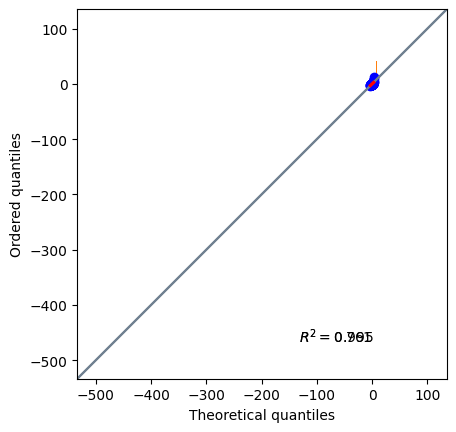

In [4]:
# assess normality of RTs
for col in ["RT", "RT (normalized)"]:
    rts = agg[col]
    rts.plot.hist(bins=50, sharey=True)
    
# test for normality
# null hypothesis: RTs come from a normal distribution
for col in ["RT", "RT (normalized)"]:
    print("Normality test for %s" % col)
    display(pg.normality(agg[col]))

# Q-Q plots
for col in ["RT", "RT (normalized)"]:
    pg.qqplot(agg[col], dist="norm")